In [30]:
import pandas as pd
df = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

In [31]:
df

Condition                     Drug Indication Type  \
0     Acute Bacterial Sinusitis             Levofloxacin   On Label   RX   
1     Acute Bacterial Sinusitis             Levofloxacin   On Label   RX   
2     Acute Bacterial Sinusitis             Moxifloxacin   On Label   RX   
3     Acute Bacterial Sinusitis             Azithromycin   On Label   RX   
4     Acute Bacterial Sinusitis             Azithromycin   On Label   RX   
...                         ...                      ...        ...  ...   
2214   vulvovaginal candidiasis             Clotrimazole   On Label  OTC   
2215   vulvovaginal candidiasis     Butoconazole Nitrate   On Label   RX   
2216   vulvovaginal candidiasis             Clotrimazole   On Label  OTC   
2217   vulvovaginal candidiasis     Butoconazole Nitrate   On Label  OTC   
2218   vulvovaginal candidiasis  Miconazole-Skin Clnsr17   On Label  OTC   

          Reviews  Effective  EaseOfUse  Satisfaction  \
0     994 Reviews       2.52       3.01          1.84   
1     994 Reviews       2.52       3.01          1.84   
2     755 Reviews       2.78       3.00          2.08   
3     584 Reviews       3.21       4.01          2.57   
4     584 Reviews       3.21       4.01          2.57   
...           ...        ...        ...           ...   
2214    2 Reviews       5.00       5.00          5.00   
2215    1 Reviews       5.00       5.00          5.00   
2216    1 Reviews       5.00       4.00          5.00   
2217    1 Reviews       5.00       5.00          5.00   
2218    1 Reviews       1.00       4.00          1.00   

                                            Information  
0     \r\n\t\t\t\t\tLevofloxacin is used to treat a ...  
1     \r\n\t\t\t\t\tLevofloxacin is used to treat a ...  
2     \r\n\t\t\t\t\t This is a generic drug. The ave...  
3     \r\n\t\t\t\t\tAzithromycin is an antibiotic (m...  
4     \r\n\t\t\t\t\tAzithromycin is an antibiotic (m...  
...                                                 ...  
2214  \r\n\t\t\t\t\tClotrimazole is used to treat sk...  
2215  \r\n\t\t\t\t\tThis medication is used to treat...  
2216  \r\n\t\t\t\t\tClotrimazole is used to treat sk...  
2217  \r\n\t\t\t\t\tThis medication is used to treat...  
2218  \r\n\t\t\t\t\tThis medication is used to treat...  

[2219 rows x 9 columns]

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print("Data Overview:")
print(data.info())
print("\nFirst few rows:")
print(data.head())

# Data Quality Check implementations
# Missing values check
print("\nMissing Values:")
print(data.isnull().sum())

# Duplicate records check
duplicate_rows = data.duplicated(keep=False)
print("\nDuplicate Rows:")
print(data[duplicate_rows])

# Data types validation
print("\nData Types:")
print(data.dtypes)

# Range checks (example)
print("\nRange Checks for Age (assuming age column exists):")
# print(data[data['Age'] < 0] | data[data['Age'] > 120])  # Hypothetical age column

# Outlier detection (example)
print("\nOutliers in Efficacy Ratings:")
# efficacy_q1 = data['Efficacy'].quantile(0.25)
# efficacy_q3 = data['Efficacy'].quantile(0.75)
# iqr = efficacy_q3 - efficacy_q1
# lower_bound = efficacy_q1 - 1.5 * iqr
# upper_bound = efficacy_q3 + 1.5 * iqr
# print(data[(data['Efficacy'] < lower_bound) | (data['Efficacy'] > upper_bound)])

# Further analysis will be based on the cleaned and verified data


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.2+ KB
None

First few rows:
                   Condition          Drug Indication Type      Reviews  \
0  Acute Bacterial Sinusitis  Levofloxacin   On Label   RX  994 Reviews   
1  Acute Bacterial Sinusitis  Levofloxacin   On Label   RX  994 Reviews   
2  Acute Bacterial Sinusitis  Moxifloxacin   On Label   RX  755 Reviews   
3  Acute Bacterial Sinusitis  

In [33]:
df.isnull().any()

Condition       False
Drug            False
Indication      False
Type            False
Reviews         False
Effective       False
EaseOfUse       False
Satisfaction    False
Information     False
dtype: bool

In [34]:
# Analyzing which drug is used to treat the maximum number of conditions

# Grouping by 'Drug' and counting unique 'Condition' for each drug
drug_condition_count = data.groupby('Drug')['Condition'].nunique().reset_index()

# Finding the drug with the maximum number of unique conditions treated
max_condition_drug = drug_condition_count.loc[drug_condition_count['Condition'].idxmax()]

max_condition_drug


Drug         Erythromycin
Condition               4
Name: 195, dtype: object

In [35]:
df['Effective'] = df['Effective'].fillna(0)

In [36]:
df['Satisfaction'] = df['Satisfaction'].fillna(0)

In [37]:
### Q1: Data Quality Checks

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Check for data types and inconsistencies
data_types = data.dtypes

# Summary statistics to identify outliers or incorrect ranges
summary_statistics = data.describe()

print(missing_values,duplicate_rows, data_types, summary_statistics)

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64 466 Condition        object
Drug             object
Indication       object
Type             object
Reviews          object
Effective       float64
EaseOfUse       float64
Satisfaction    float64
Information      object
dtype: object          Effective    EaseOfUse  Satisfaction
count  2219.000000  2219.000000   2219.000000
mean      3.557972     3.958824      3.218774
std       1.113128     1.037877      1.230933
min       1.000000     1.000000      1.000000
25%       3.000000     3.540000      2.400000
50%       3.680000     4.100000      3.130000
75%       4.330000     5.000000      4.000000
max       5.000000     5.000000      5.000000


In [38]:



### Q2: Drug Treating Maximum Number of Conditions
# Count the unique conditions each drug is used for
drug_condition_counts = data.groupby('Drug')['Condition'].nunique().sort_values(ascending=False)

# Identify the drug with the maximum number of conditions treated
max_condition_drug = drug_condition_counts.idxmax()

print(max_condition_drug)

Levofloxacin


In [39]:


### Q3: Most Effective Drug to Treat Fever
# Filter data for fever
fever_data = data[data['Condition'].str.contains('Fever', case=False)]

# Find the most effective drug for fever
most_effective_fever_drug = fever_data.loc[fever_data['Effective'].idxmax(), 'Drug']

print(most_effective_fever_drug)

Acetaminophen-Caffeine


In [40]:



### Q4: Drug with Both On Label and Off Label Indications

# Filter drugs with both on label and off label indications
both_indications = data.groupby('Drug').apply(lambda x: x['Indication'].nunique() > 1)

# Select drugs that have both indications
drugs_both = both_indications[both_indications].index

# Average efficacy and satisfaction for these drugs from off label usage
average_metrics = data[(data['Drug'].isin(drugs_both)) & (data['Indication'] == 'Off Label')][['Effective', 'Satisfaction']].mean()

print(drugs_both, average_metrics)

Index(['Acetaminophen-Pamabrom, Ibuprofen',
       'Al Hyd-Mg Tr-Alg Ac-Sod Bicarb, Magaldrate, Aluminum-Magnesium Hydroxide, Calcium Carbonate-Mag Hydroxid, Aluminum Hydrox-Magnesium Carb, Calcium And Magnesium Carbonat, Aluminum-Magnesium-Alginate, Calcium Carbonate, Dihydroxyaluminum Sod Carb, Alum-Mag Hydroxide-Simeth',
       'Alum-Mag Hydroxide-Simeth',
       'Aluminum-Magnesium Hydroxide, Alum-Mag Hydroxide-Simeth',
       'Aluminum-Magnesium Hydroxide, Aluminum Hydrox-Magnesium Carb, Dihydroxyaluminum Sod Carb, Alum-Mag Hydroxide-Simeth',
       'Aluminum-Magnesium Hydroxide, Calcium Carbonate, Alum-Mag Hydroxide-Simeth',
       'Aluminum-Magnesium Hydroxide, Calcium Carbonate-Mag Hydroxid, Calcium And Magnesium Carbonat, Calcium Carbonate, Alum-Mag Hydroxide-Simeth',
       'Aluminum-Magnesium-Alginate, Alum-Mag Hydroxide-Simeth',
       'Amitriptyline', 'Amoxicillin-Pot Clavulanate', 'Ampicillin Sodium',
       'Bumetanide', 'Cefaclor', 'Cefdinir', 'Ciprofloxacin',
       'C

In [41]:



### Q5: Most Effective and Easiest to Use Drug

# Calculate a combined score of effectiveness and ease of use
data['CombinedScore'] = data['Effective'] + data['EaseOfUse']

# Find the drug with the highest combined score
best_overall_drug = data.loc[data['CombinedScore'].idxmax(), 'Drug']

print(best_overall_drug)


Ampicillin Sodium


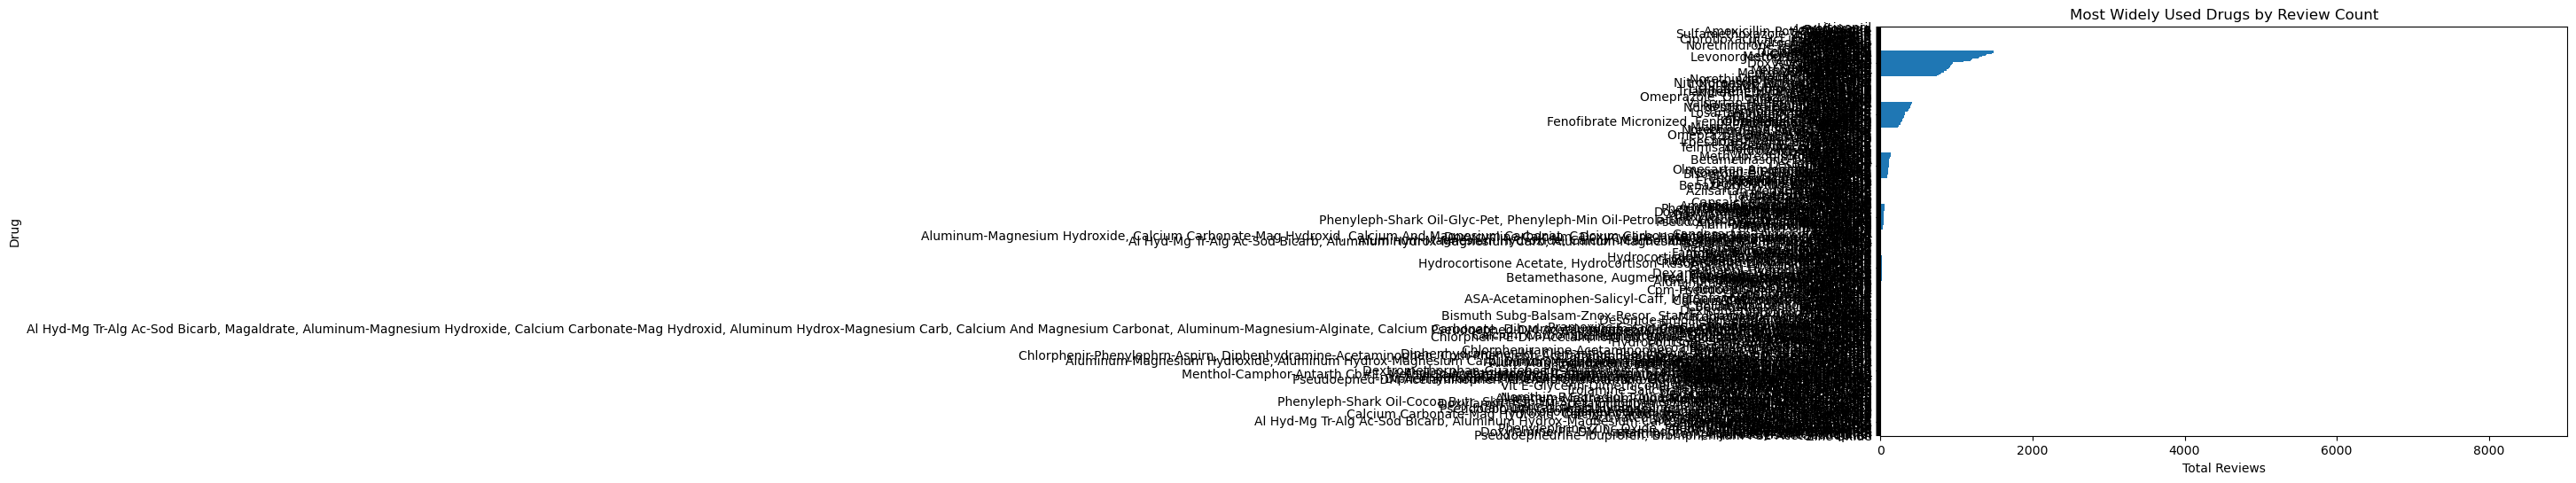

In [42]:

### Q6: Most Widely Used Drug Visualization

import matplotlib.pyplot as plt

# Convert review strings to integers
data['ReviewCount'] = data['Reviews'].str.extract('(\d+)').astype(int)

# Summarize review counts by drug
review_counts = data.groupby('Drug')['ReviewCount'].sum()

# Plotting
plt.figure(figsize=(10, 6))
review_counts.sort_values().plot(kind='barh')
plt.xlabel('Total Reviews')
plt.ylabel('Drug')
plt.title('Most Widely Used Drugs by Review Count')
plt.show()

In [43]:



### Q7: Main Reason for Not Preferring a Particular Drug
# Assuming the main reason for not preferring a drug might be low satisfaction or effectiveness
lowest_rated_drug = data.loc[data['Satisfaction'].idxmin(), 'Drug']
main_reason = f"Low satisfaction rating for {lowest_rated_drug}"

print(main_reason)

Low satisfaction rating for Erythromycin Ethylsuccinate


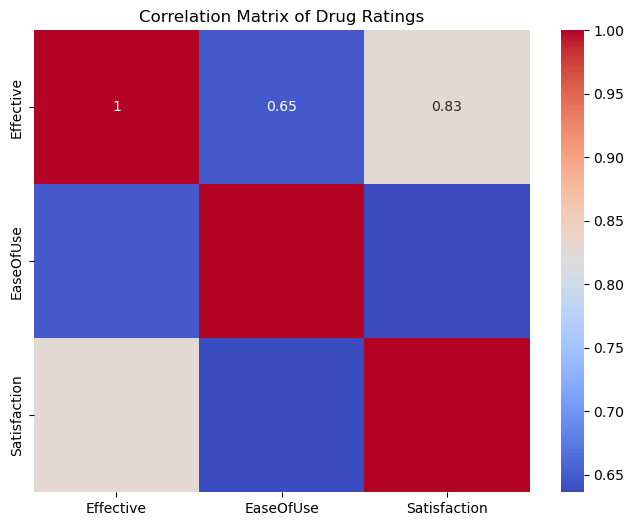

In [44]:
#For further analysis
#Creating a heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
corr = data[['Effective', 'EaseOfUse', 'Satisfaction']].corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Drug Ratings')
plt.show()


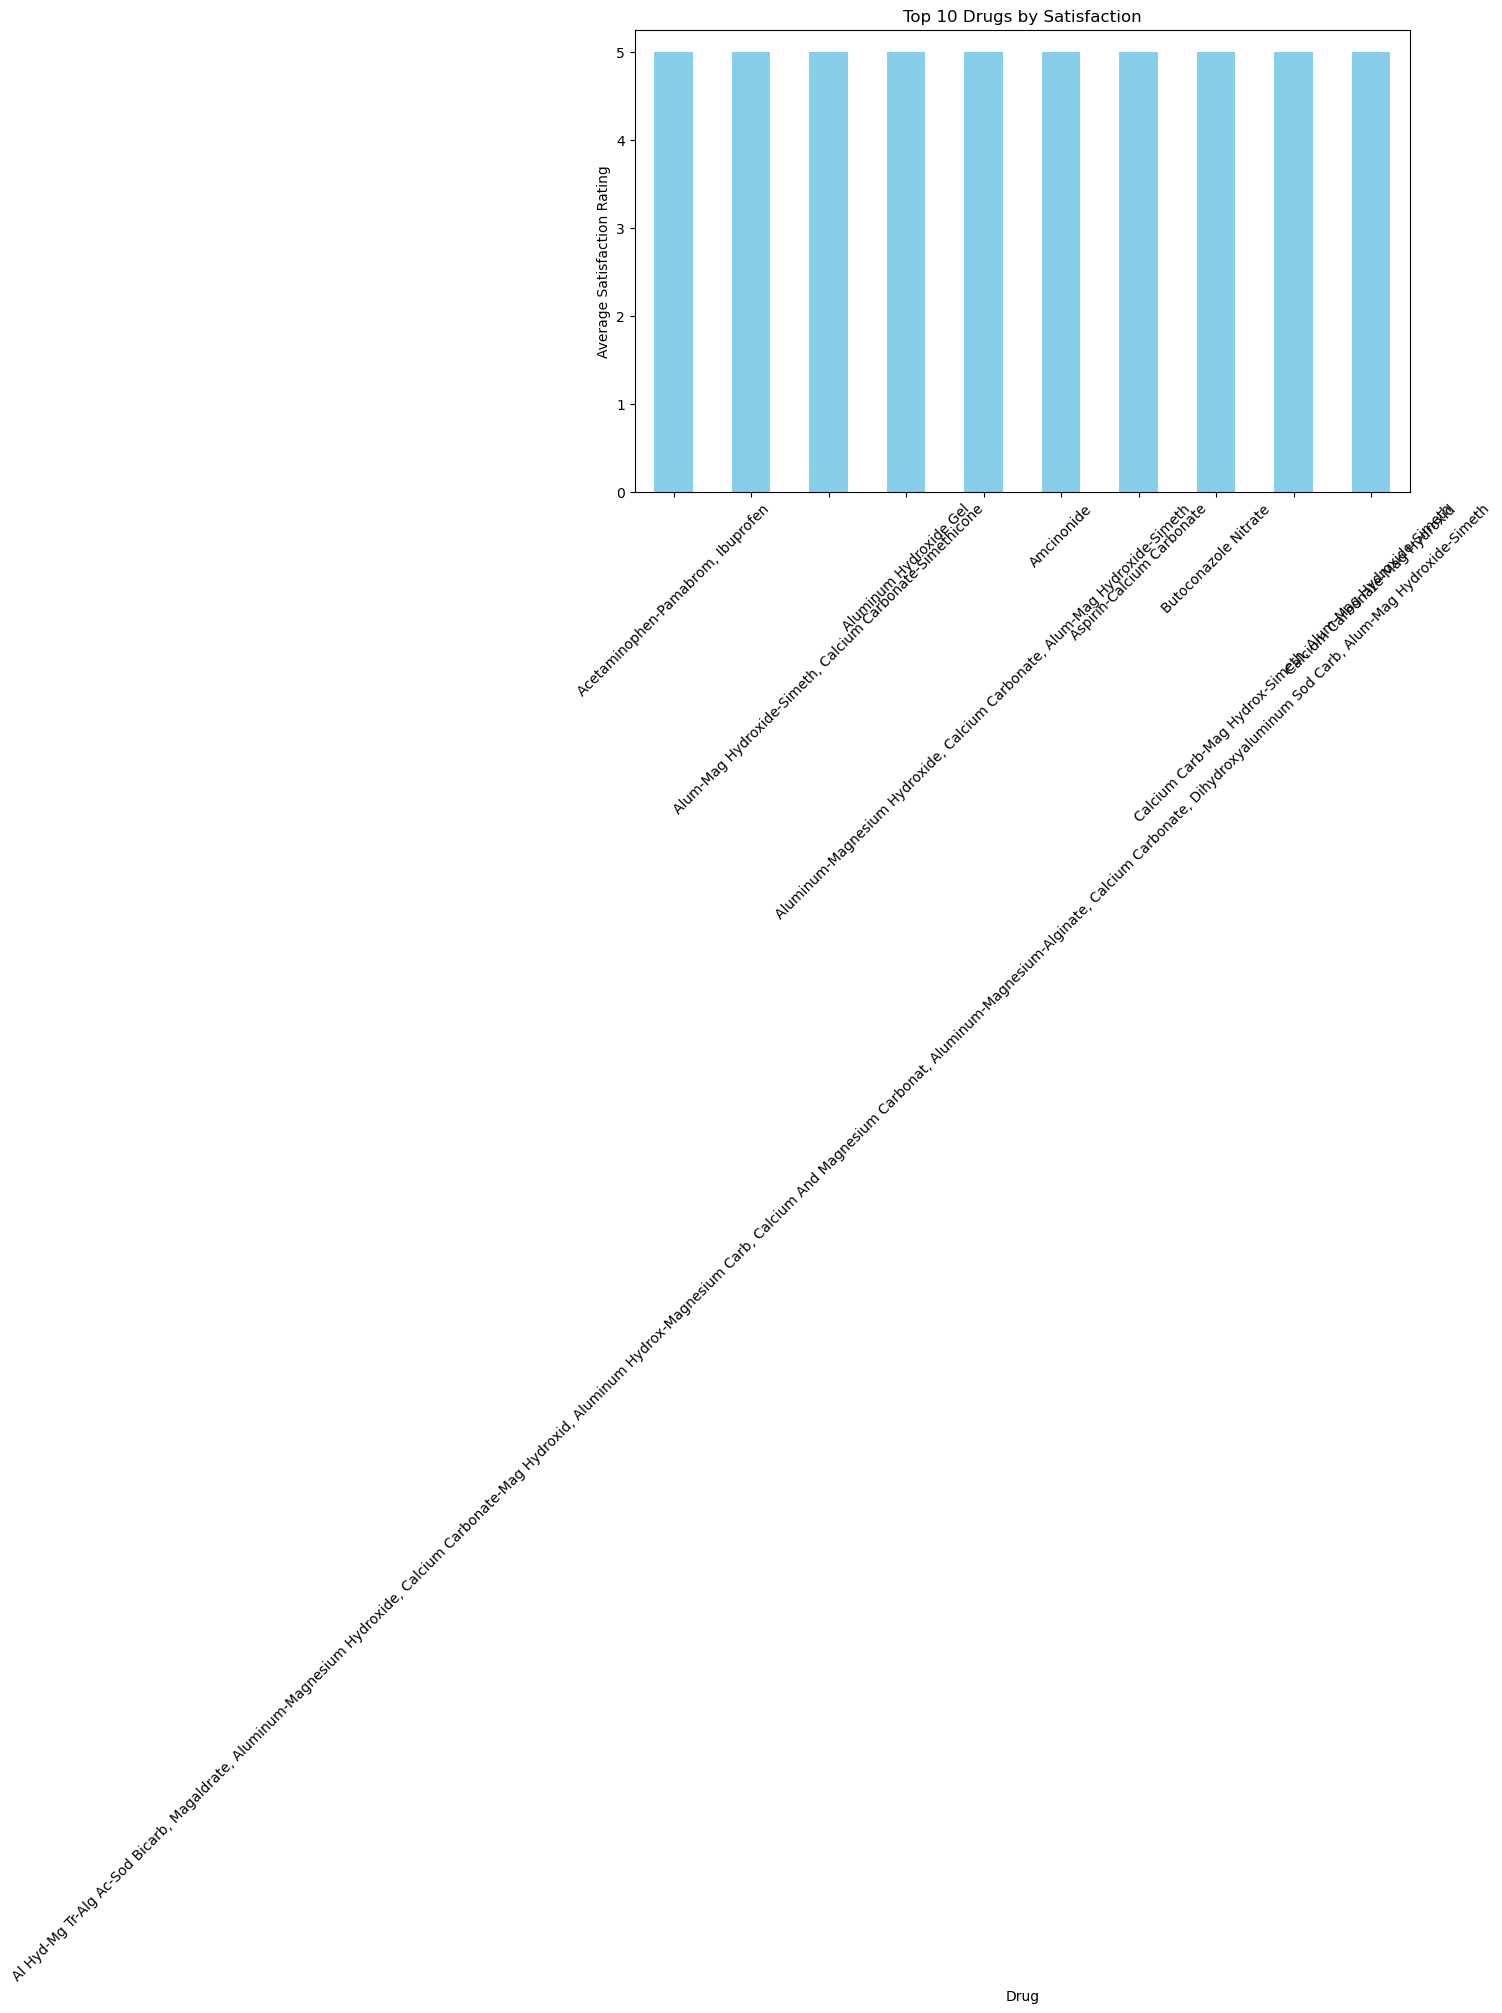

In [45]:
# Top 10 drugs by average satisfaction
top_drugs_satisfaction = data.groupby('Drug')['Satisfaction'].mean().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
top_drugs_satisfaction.plot(kind='bar', color='skyblue')
plt.title('Top 10 Drugs by Satisfaction')
plt.ylabel('Average Satisfaction Rating')
plt.xlabel('Drug')
plt.xticks(rotation=45)
plt.show()


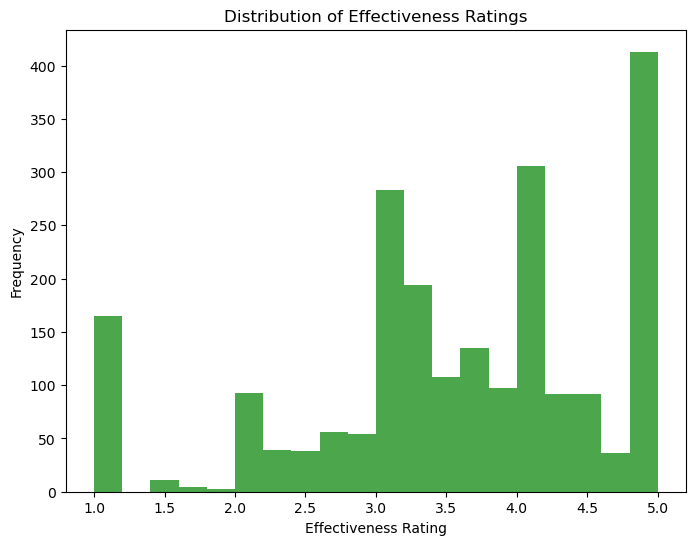

In [46]:
#Histogram of Effectiveness Ratings
plt.figure(figsize=(8, 6))
plt.hist(data['Effective'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Effectiveness Ratings')
plt.xlabel('Effectiveness Rating')
plt.ylabel('Frequency')
plt.show()


) missing from current font.Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


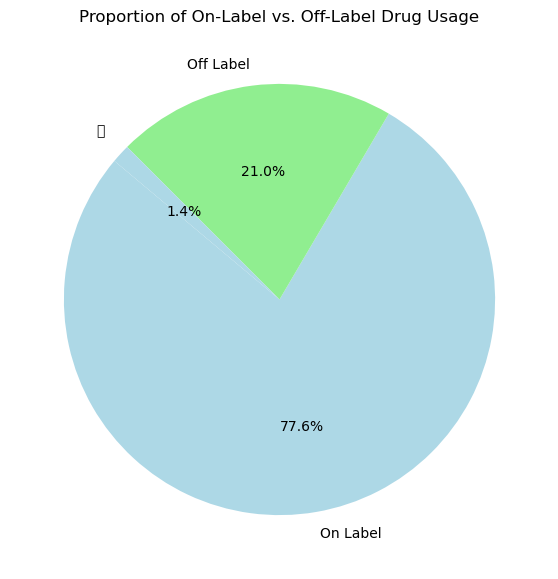

In [47]:
#Pie Chart of On-Label vs. Off-Label Drug Indications:
labels = data['Indication'].value_counts().index
sizes = data['Indication'].value_counts().values

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Proportion of On-Label vs. Off-Label Drug Usage')
plt.show()


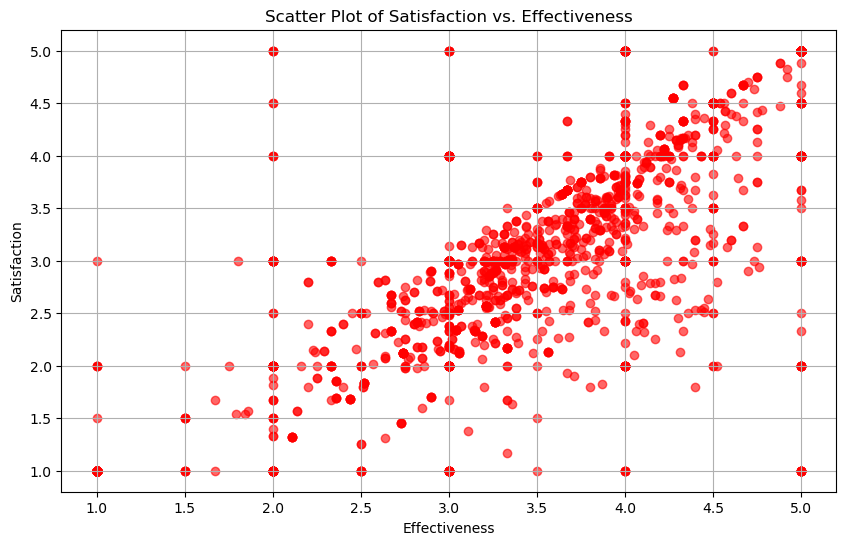

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Effective'], data['Satisfaction'], alpha=0.6, c='red')
plt.title('Scatter Plot of Satisfaction vs. Effectiveness')
plt.xlabel('Effectiveness')
plt.ylabel('Satisfaction')
plt.grid(True)


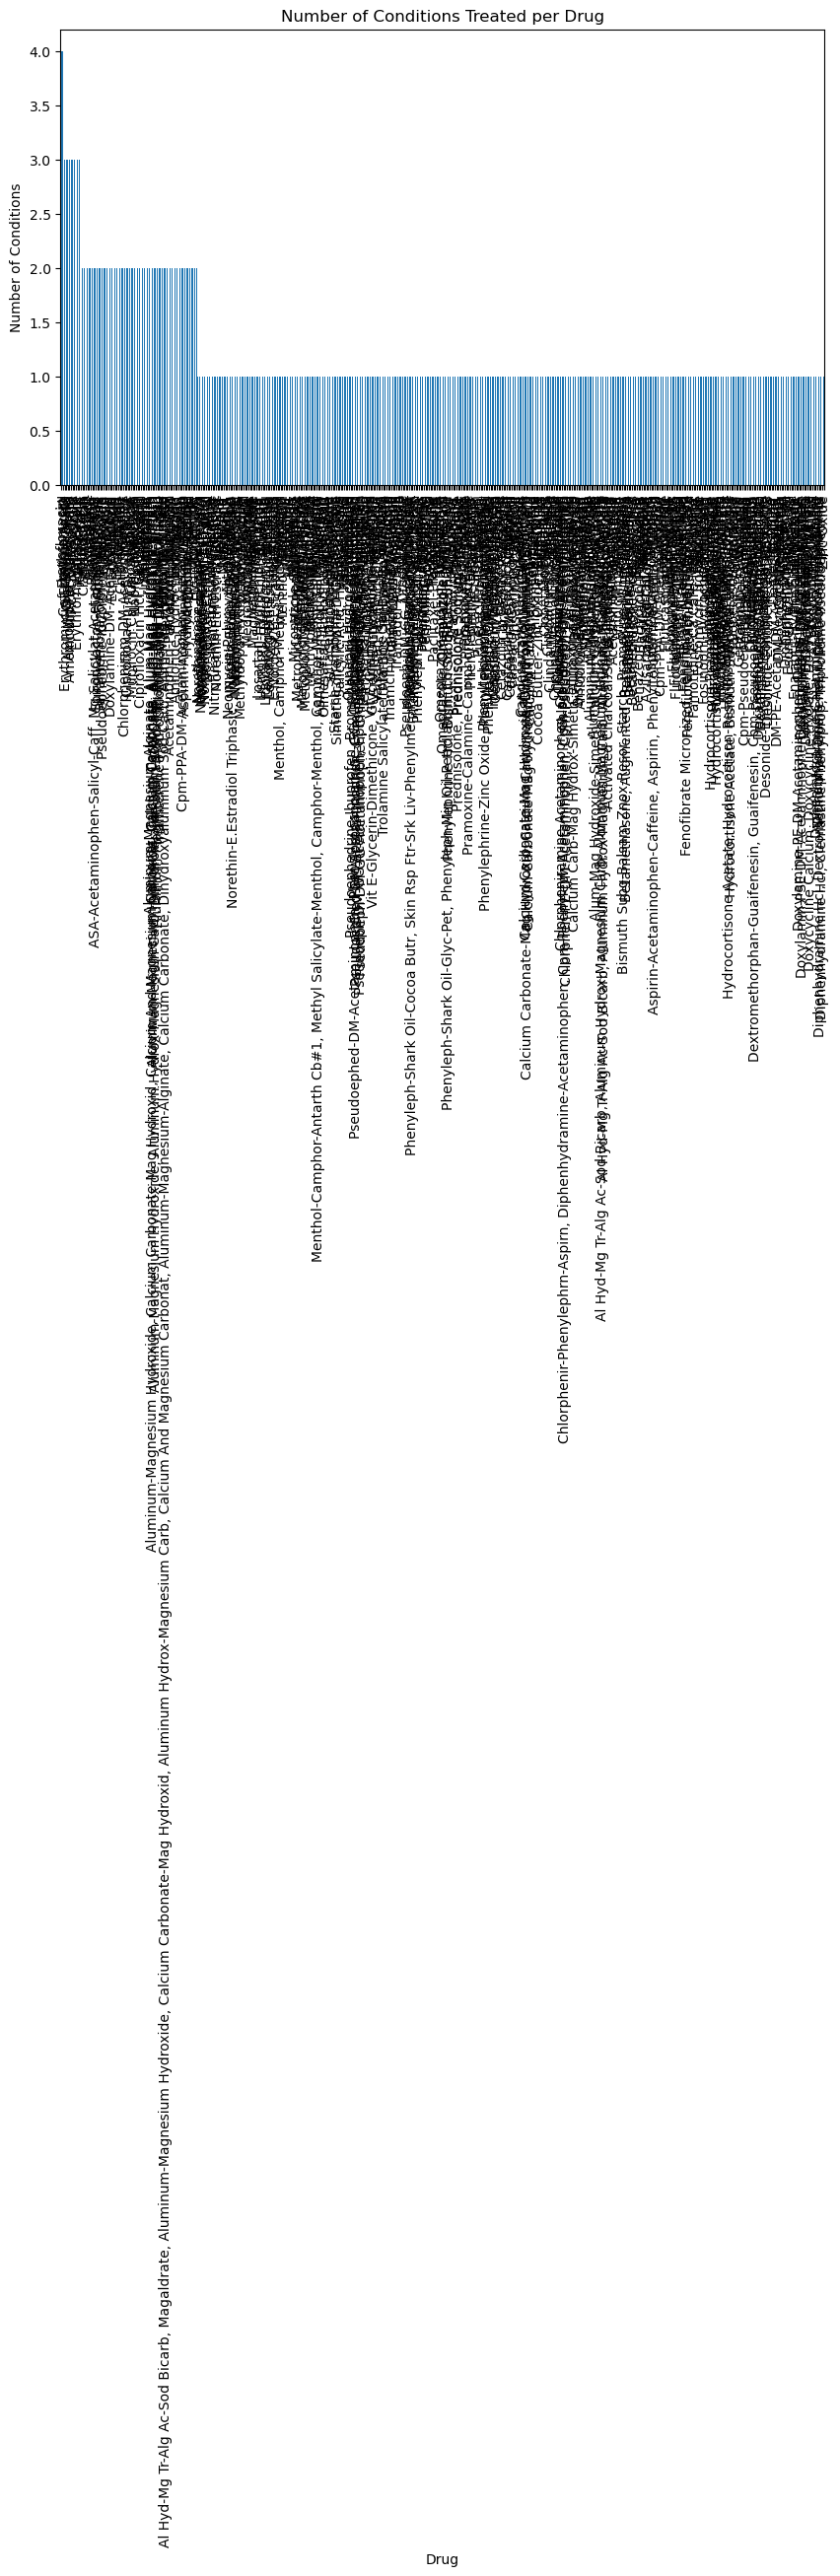

In [49]:
# Bar Chart for Drug Usage Across Conditions
#Drug Effectiveness
import matplotlib.pyplot as plt

# Count unique conditions per drug
drug_condition_counts = data.groupby('Drug')['Condition'].nunique()

# Plot
plt.figure(figsize=(10, 6))
drug_condition_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Conditions Treated per Drug')
plt.xlabel('Drug')
plt.ylabel('Number of Conditions')
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


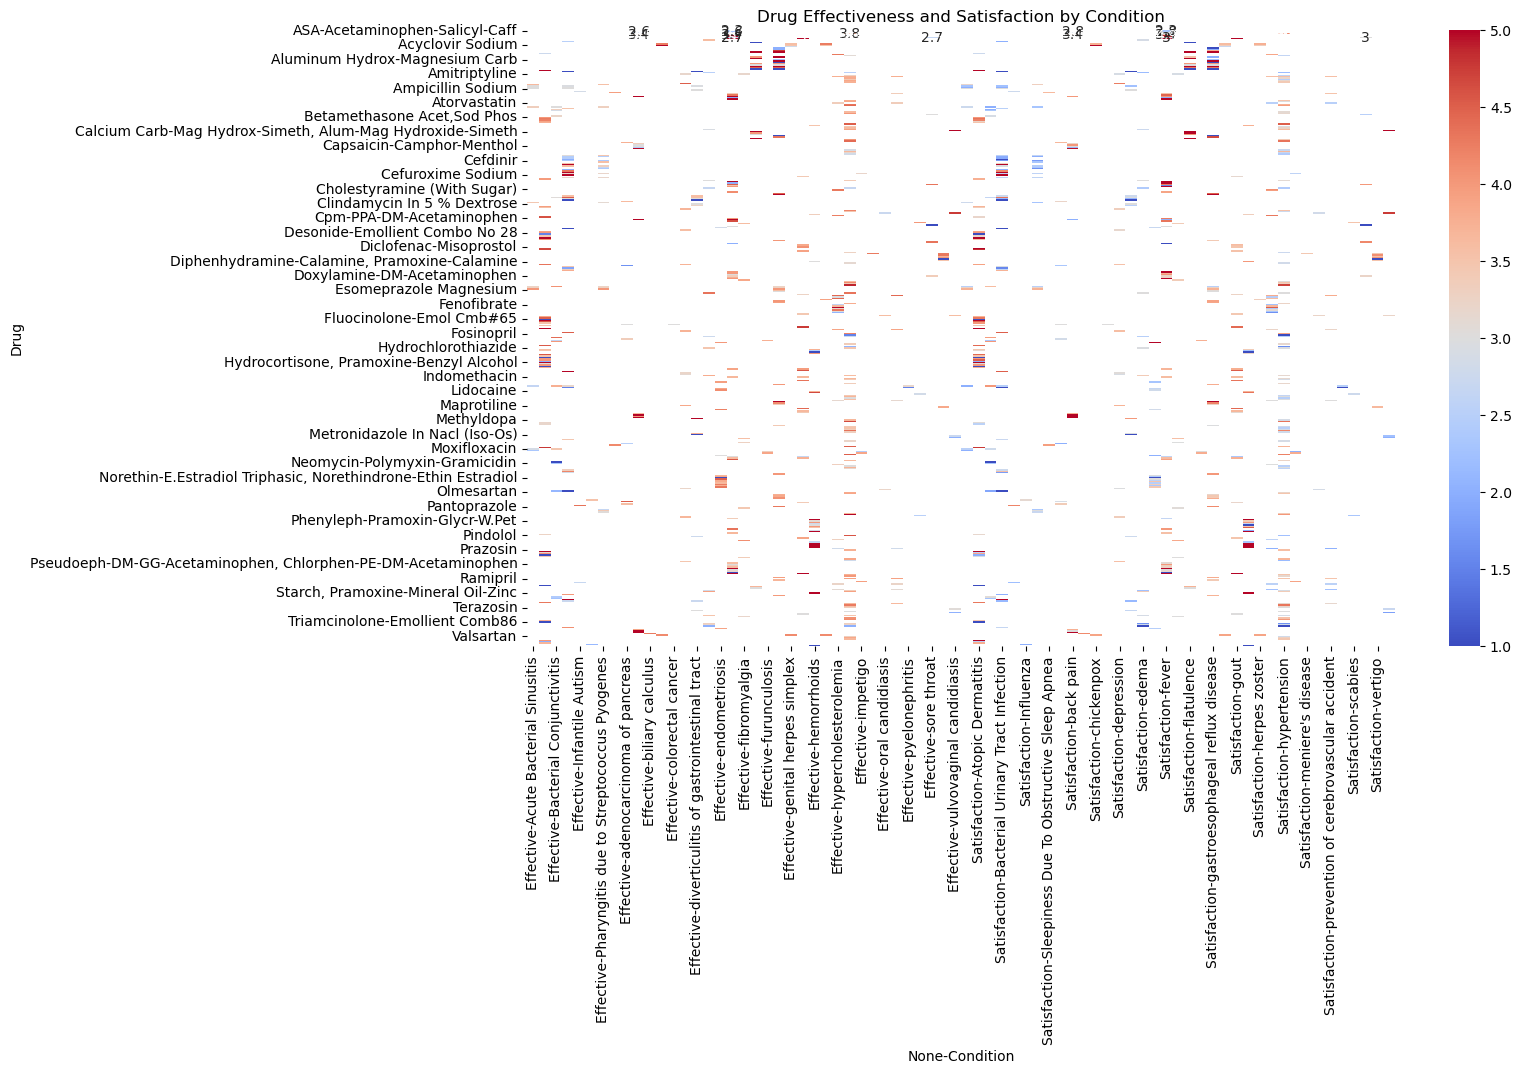

In [50]:
import seaborn as sns

# Create a pivot table
pivot_table = data.pivot_table(index='Drug', columns='Condition', values=['Effective', 'Satisfaction'], aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Drug Effectiveness and Satisfaction by Condition')
plt.show()


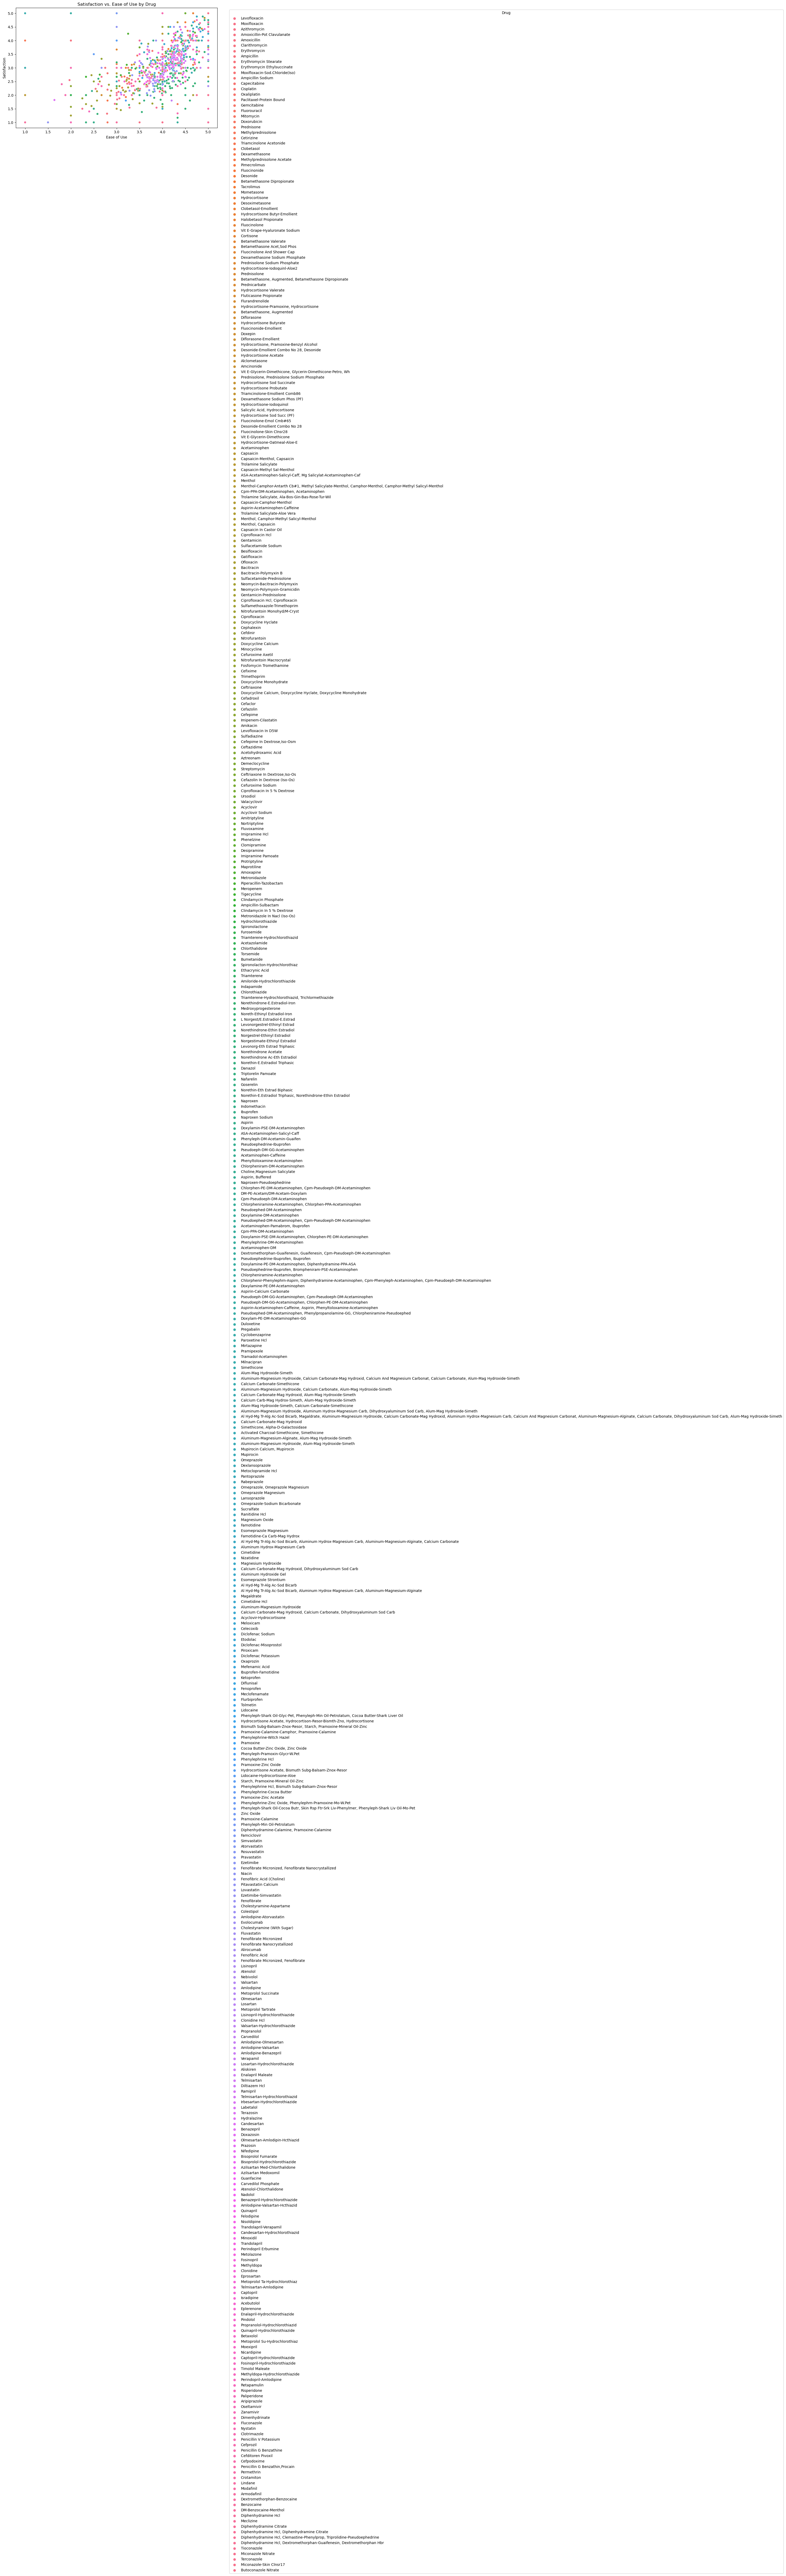

In [51]:
# Scatter Plot of Satisfaction vs. Ease of Use
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EaseOfUse', y='Satisfaction', hue='Drug', data=data)
plt.title('Satisfaction vs. Ease of Use by Drug')
plt.xlabel('Ease of Use')
plt.ylabel('Satisfaction')
plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


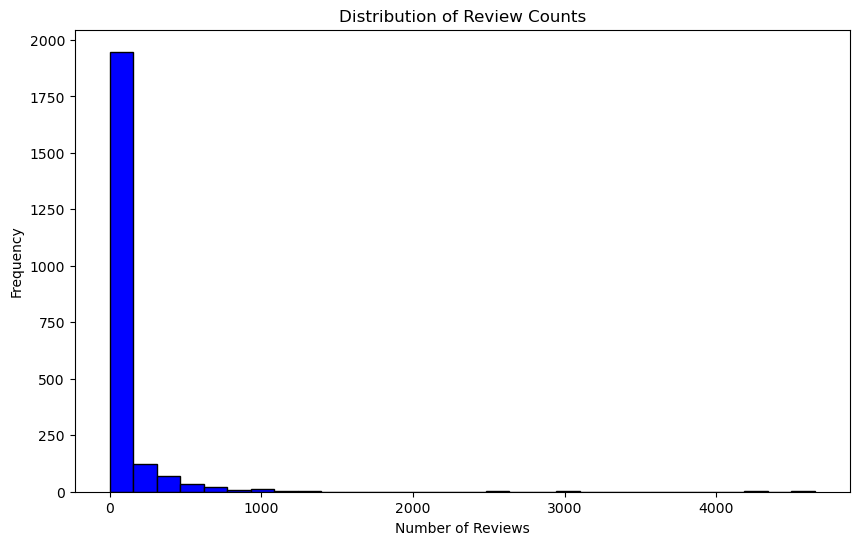

In [52]:
#Histogram of Review Counts
# Convert review strings to integers
data['ReviewCount'] = data['Reviews'].str.extract('(\d+)').astype(int)

# Plot
plt.figure(figsize=(10, 6))
plt.hist(data['ReviewCount'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


<Figure size 1200x800 with 0 Axes>

) missing from current font.Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


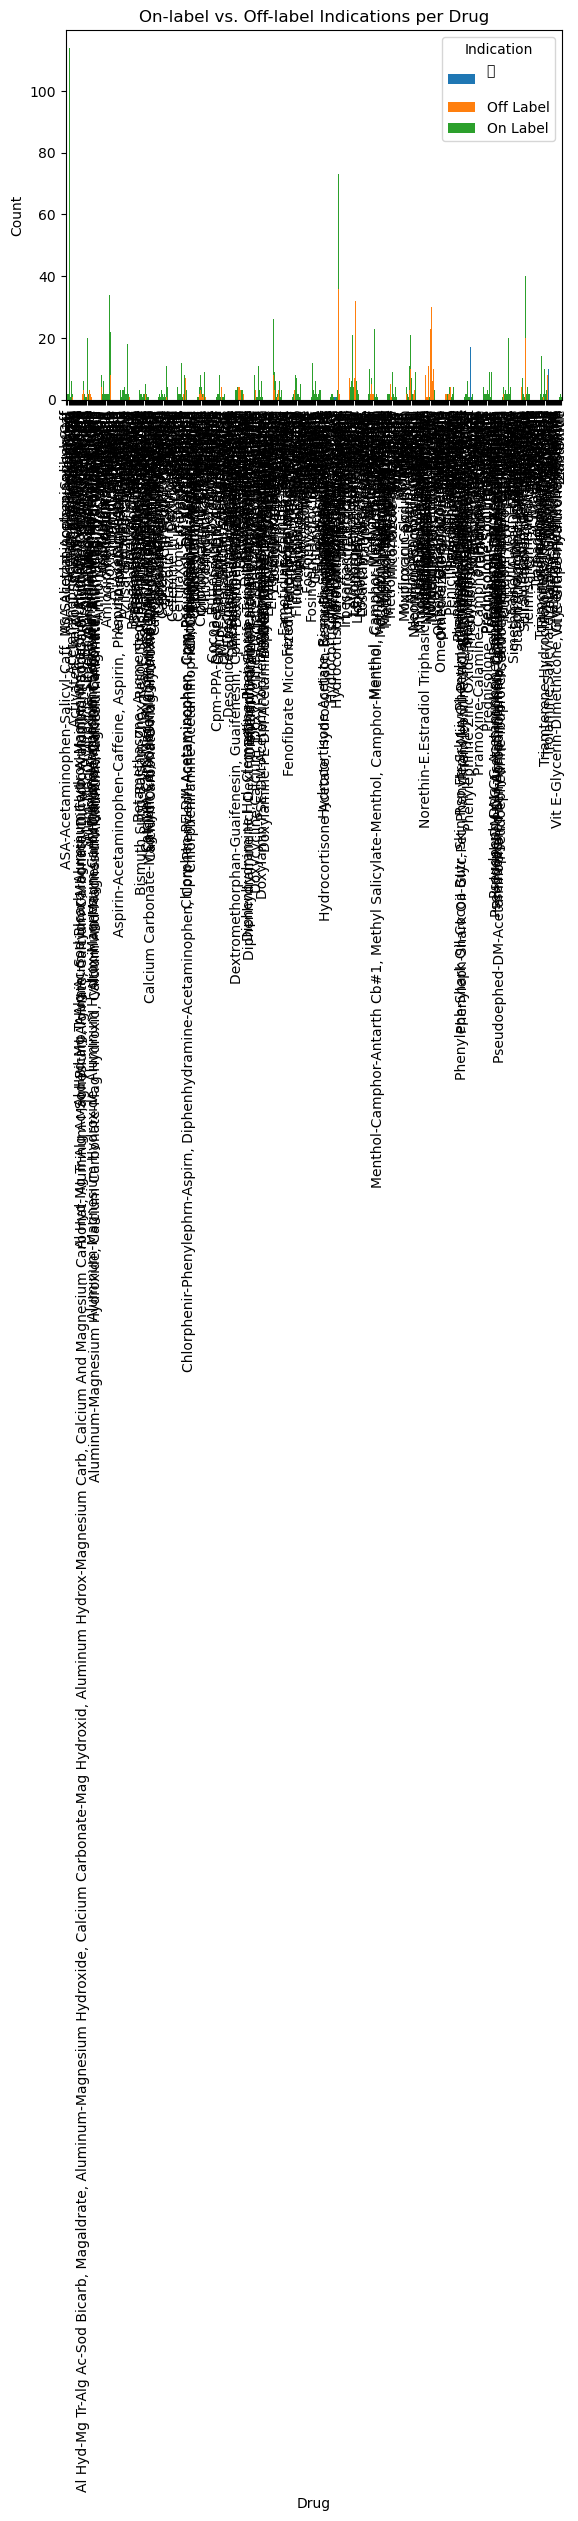

In [53]:
#Stacked Bar Chart for On-label vs. Off-label Indications
# Prepare data
indication_counts = data.groupby(['Drug', 'Indication']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 8))
indication_counts.plot(kind='bar', stacked=True)
plt.title('On-label vs. Off-label Indications per Drug')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.legend(title='Indication')
plt.show()


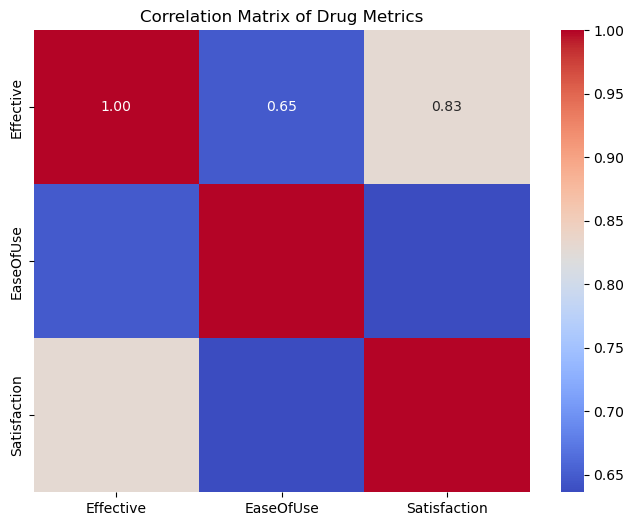

In [54]:
#Correlation Matrix and Heatmap Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# First, ensure that all relevant columns are in numeric format
# For example, if they're not, you would convert them like this:
# data['Effective'] = pd.to_numeric(data['Effective'], errors='coerce')
# data['EaseOfUse'] = pd.to_numeric(data['EaseOfUse'], errors='coerce')
# data['Satisfaction'] = pd.to_numeric(data['Satisfaction'], errors='coerce')

# Calculate the correlation matrix
correlation_matrix = data[['Effective', 'EaseOfUse', 'Satisfaction']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Drug Metrics')
plt.show()



In [55]:
#Let's assume you have a binary classification for "Effectiveness" where drugs are classified as Effective (1) or Not Effective (0).
#The actual labels in a column named "Actual_Effective" and predicted labels in a column named "Predicted_Effective".

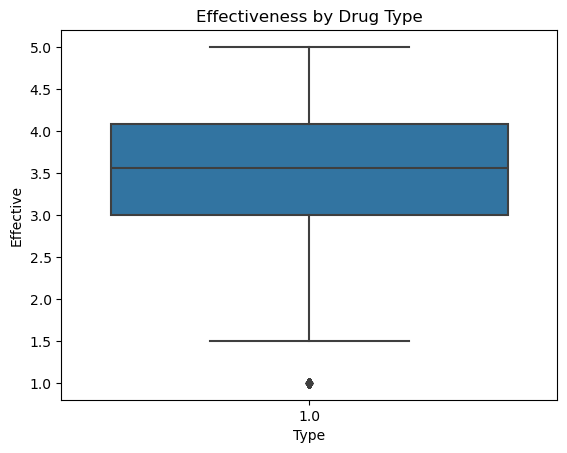

In [61]:
# Box plot of effectiveness by drug type
sns.boxplot(x='Type', y='Effective', data=data)
plt.title('Effectiveness by Drug Type')
plt.show()


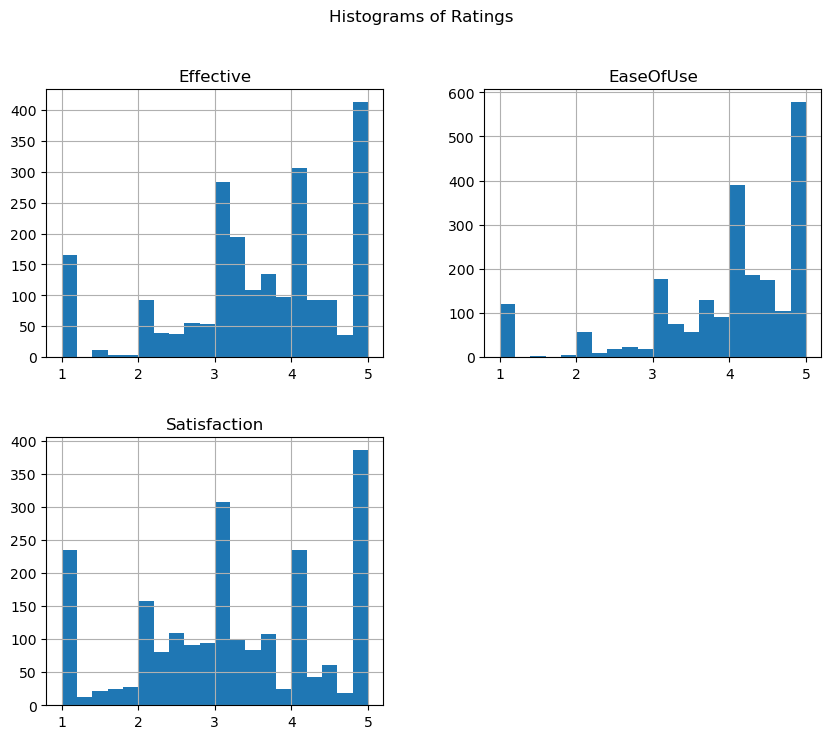

In [64]:
# Plotting histograms of numerical columns
data[['Effective', 'EaseOfUse', 'Satisfaction']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Ratings')
plt.show()


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data (replace with your path)
data = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

# Preprocessing: Clean the 'Reviews' and map 'Type' to binary
data['Reviews'] = data['Reviews'].str.extract('(\d+)').astype(float)
data['Type'] = data['Type'].map({'RX': 1}).fillna(0)

# Define features (X) and target (y)
X = data[['Effective', 'EaseOfUse', 'Satisfaction']]
y = data['Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (neural networks perform better with normalized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5805 - loss: 0.6799 - val_accuracy: 0.7267 - val_loss: 0.6376
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6933 - loss: 0.6398 - val_accuracy: 0.7312 - val_loss: 0.6040
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6869 - loss: 0.6133 - val_accuracy: 0.7207 - val_loss: 0.5768
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6962 - loss: 0.5931 - val_accuracy: 0.7312 - val_loss: 0.5555
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6859 - loss: 0.5894 - val_accuracy: 0.7252 - val_loss: 0.5626
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7058 - loss: 0.5858 - val_accuracy: 0.7342 - val_loss: 0.5472
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7128 - loss: 0.5764 - val_accuracy: 0.7222 - val_loss: 0.5417
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7159 - loss: 0.5594 - val_accuracy: 0.7222 - val_loss:

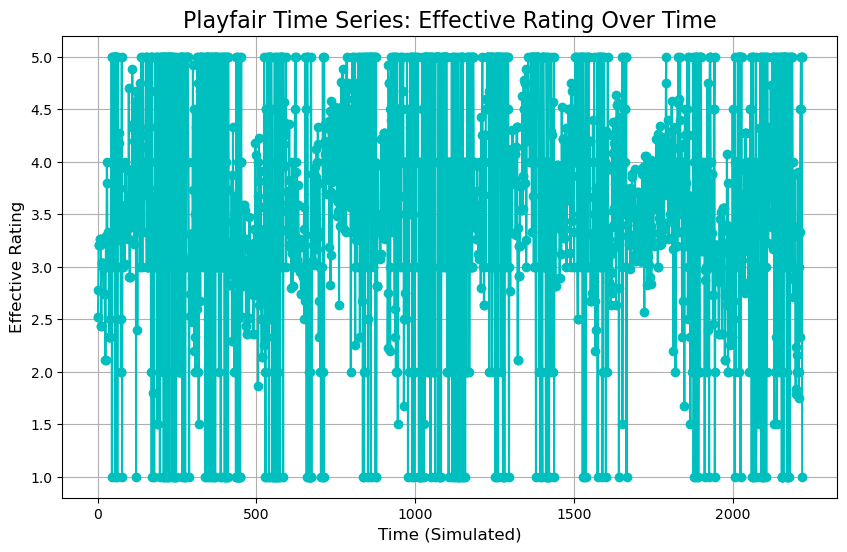

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your file path)
data = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

# Simulate the time series by using the index as the time component
data['Index'] = data.index

# Plot a Playfair-style time series for 'Effective' over time (using Index)
plt.figure(figsize=(10, 6))
plt.plot(data['Index'], data['Effective'], marker='o', color='c', linestyle='-', label='Effective')

# Adding labels and title in Playfair style
plt.title('Playfair Time Series: Effective Rating Over Time', fontsize=16)
plt.xlabel('Time (Simulated)', fontsize=12)
plt.ylabel('Effective Rating', fontsize=12)

# Displaying grid for better readability
plt.grid(True)

# Display the plot
plt.show()


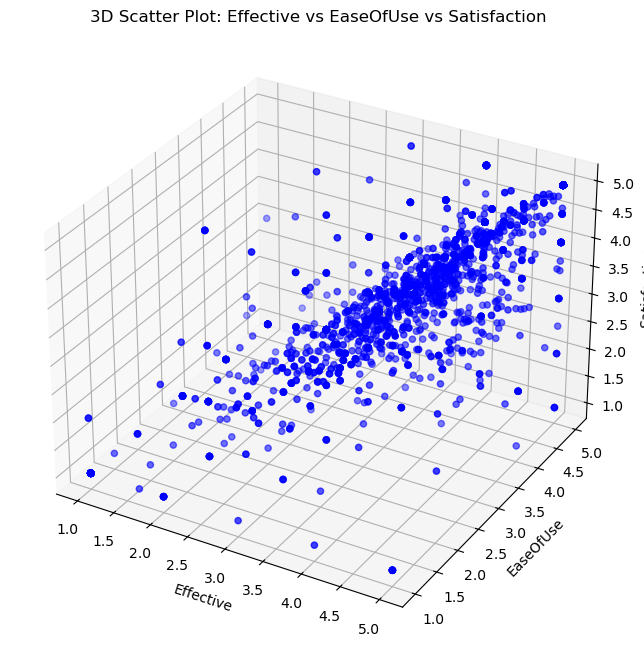

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset (replace with your file path)
data = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

# Create a 3D scatter plot with 'Effective', 'EaseOfUse', and 'Satisfaction'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Effective'], data['EaseOfUse'], data['Satisfaction'], c='b', marker='o')

# Set labels
ax.set_xlabel('Effective')
ax.set_ylabel('EaseOfUse')
ax.set_zlabel('Satisfaction')

# Set title
plt.title('3D Scatter Plot: Effective vs EaseOfUse vs Satisfaction')

# Show plot
plt.show()


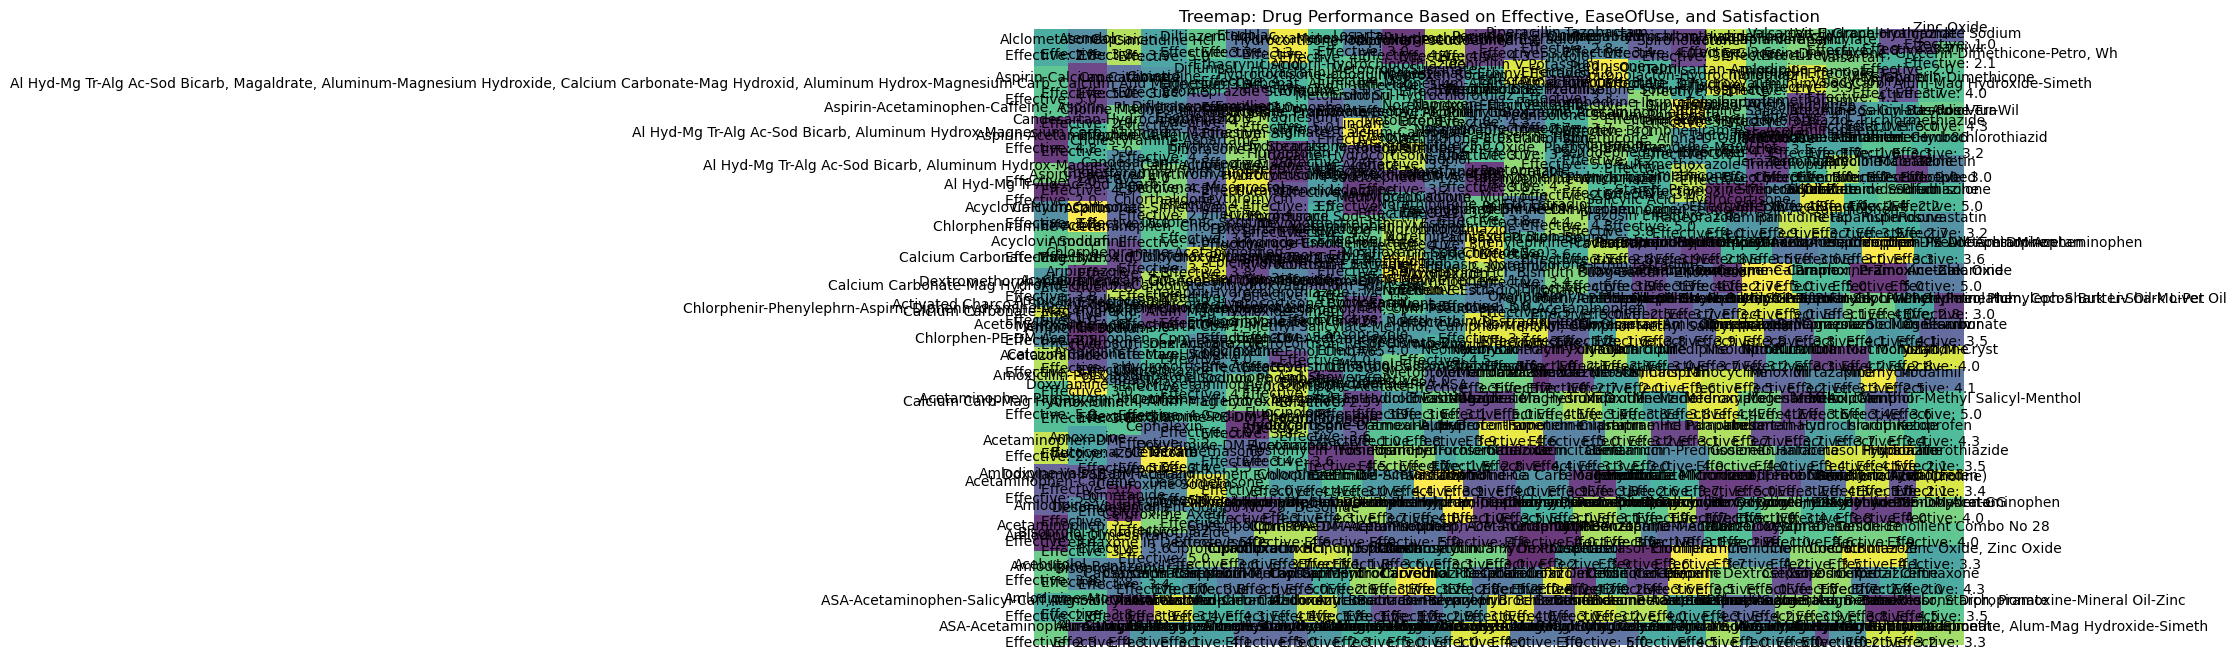

In [77]:
!pip install squarify
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load the dataset (replace with your file path)
data = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

# Example: Group by 'Drug' and calculate the mean of 'Effective', 'EaseOfUse', and 'Satisfaction'
grouped_data = data.groupby('Drug')[['Effective', 'EaseOfUse', 'Satisfaction']].mean()

# Flatten the data for plotting (you could use any column for size or value)
grouped_data['Size'] = grouped_data['Effective'] + grouped_data['EaseOfUse'] + grouped_data['Satisfaction']

# Prepare labels for treemap
labels = [f"{drug}\nEffective: {round(row['Effective'], 1)}" for drug, row in grouped_data.iterrows()]

# Create treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=grouped_data['Size'], label=labels, alpha=0.8)

# Set title and remove axis
plt.title('Treemap: Drug Performance Based on Effective, EaseOfUse, and Satisfaction')
plt.axis('off')

# Show plot
plt.show()


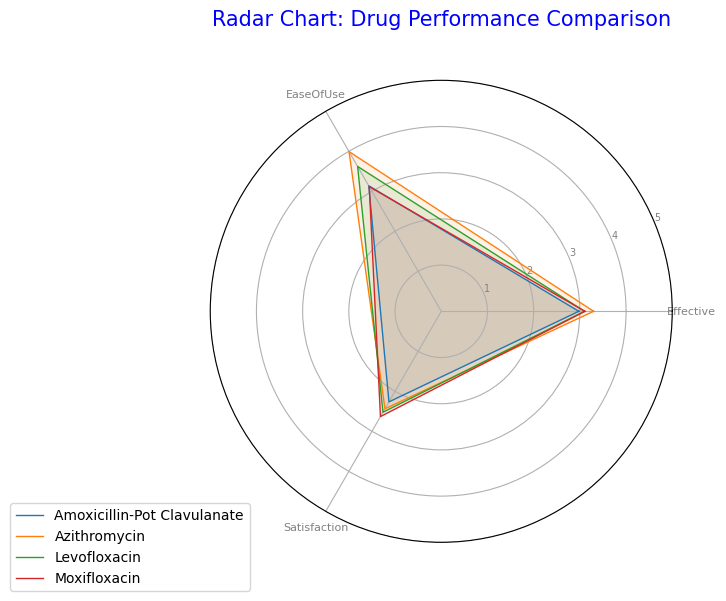

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Load the dataset (replace with your file path)
data = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

# Select the first few drugs for comparison (change this to any subset you want)
selected_drugs = data['Drug'].unique()[:4]  # Selecting the first 4 drugs for demonstration
data_selected = data[data['Drug'].isin(selected_drugs)]

# Group by 'Drug' and calculate mean values for 'Effective', 'EaseOfUse', 'Satisfaction'
grouped_data = data_selected.groupby('Drug')[['Effective', 'EaseOfUse', 'Satisfaction']].mean()

# Number of variables (dimensions)
categories = ['Effective', 'EaseOfUse', 'Satisfaction']
N = len(categories)

# Radar chart setup
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Repeat the first angle to close the circle

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each drug
for drug in grouped_data.index:
    values = grouped_data.loc[drug].values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=drug)
    ax.fill(angles, values, alpha=0.1)

# Add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
plt.yticks([1, 2, 3, 4, 5], color="grey", size=7)
plt.ylim(0, 5)

# Add a title and legend
plt.title('Radar Chart: Drug Performance Comparison', size=15, color='blue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


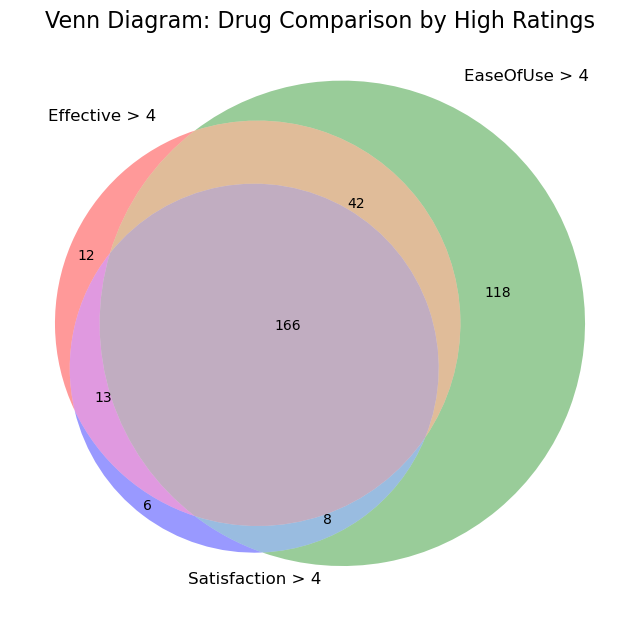

In [84]:
#Conditions for Sets: We create three sets of drugs:

#Drugs with an effectiveness rating > 4.
#Drugs with an ease of use rating > 4.
#Drugs with a satisfaction rating > 4.
#Venn Diagram: The venn3 function from the matplotlib_venn library is used to create a Venn diagram of the three sets.

#Plot: The Venn diagram visually shows the intersections between the sets (e.g., drugs that are effective, easy to use, and satisfying).
!pip install matplotlib_venn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Load the dataset (replace with your file path)
data = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

# Define sets based on conditions
effective_high = set(data[data['Effective'] > 4]['Drug'])     # Drugs with high 'Effective' rating
easeofuse_high = set(data[data['EaseOfUse'] > 4]['Drug'])      # Drugs with high 'EaseOfUse' rating
satisfaction_high = set(data[data['Satisfaction'] > 4]['Drug']) # Drugs with high 'Satisfaction' rating

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([effective_high, easeofuse_high, satisfaction_high], 
             ('Effective > 4', 'EaseOfUse > 4', 'Satisfaction > 4'))

# Add a title
plt.title('Venn Diagram: Drug Comparison by High Ratings', fontsize=16)

# Show the plot
plt.show()


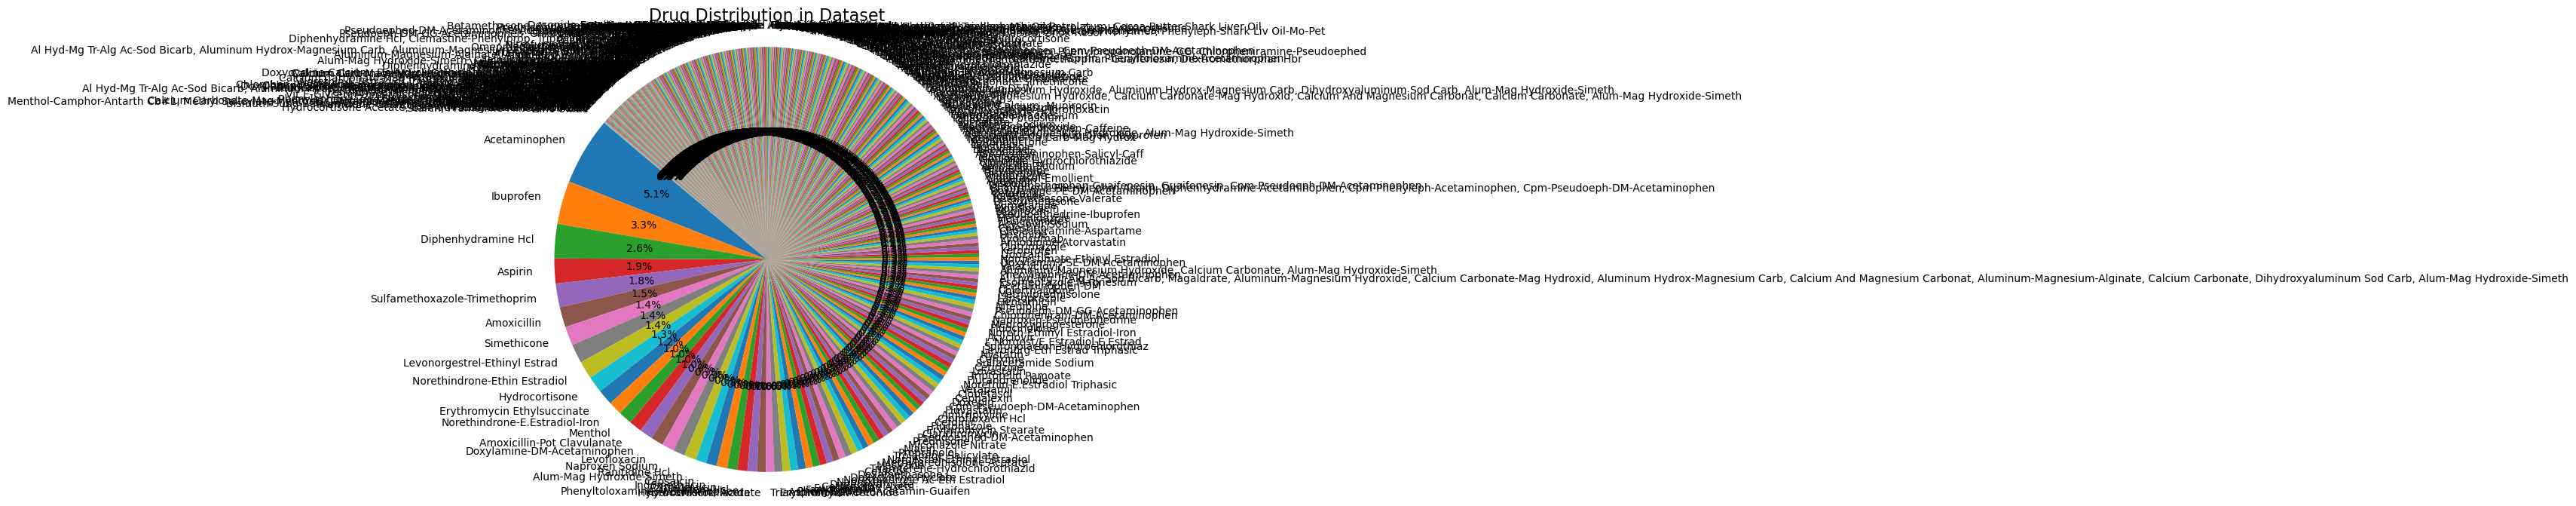

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your file path)
data = pd.read_csv('Worksheet in Pro Pharma BT Case Study-Drug Performance  -  Read-Only.csv')

# Example: Group by 'Drug' and count the number of reviews for each drug
drug_distribution = data['Drug'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(drug_distribution, labels=drug_distribution.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Drug Distribution in Dataset', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()
